In [2]:
import pandas as pd

# Load the dataset
file_path = 'Online Retail.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Convert InvoiceDate to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Check for missing values
missing_values = data.isnull().sum()

# Aggregate data to daily sales per product
# First, we need to create a date column (without time)
data['Date'] = data['InvoiceDate'].dt.date

# Group by Date and StockCode to get daily sales per product
daily_sales = data.groupby(['Date', 'StockCode'])['Quantity'].sum().reset_index()

# For this example, we will use 'StockCode' as a nominal feature. In a real scenario, it's better to use more descriptive features.
# Convert 'StockCode' to a categorical feature and encode it
daily_sales['StockCode'] = daily_sales['StockCode'].astype('category').cat.codes

# Sort by Date to ensure chronological order
daily_sales.sort_values('Date', inplace=True)

# Create lag features for Quantity, to capture sales in previous days. Here we use a 1-day lag as an example.
daily_sales['Quantity_lag1'] = daily_sales.groupby('StockCode')['Quantity'].shift(1)

# For simplicity, let's fill missing lag values with 0
daily_sales.fillna(0, inplace=True)

# Split the data into features and target
X = daily_sales[['StockCode', 'Quantity_lag1']]
y = daily_sales['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

(mae, mse, rmse)


(20.50549525535983, 4930.069296153677, 70.2144521886604)

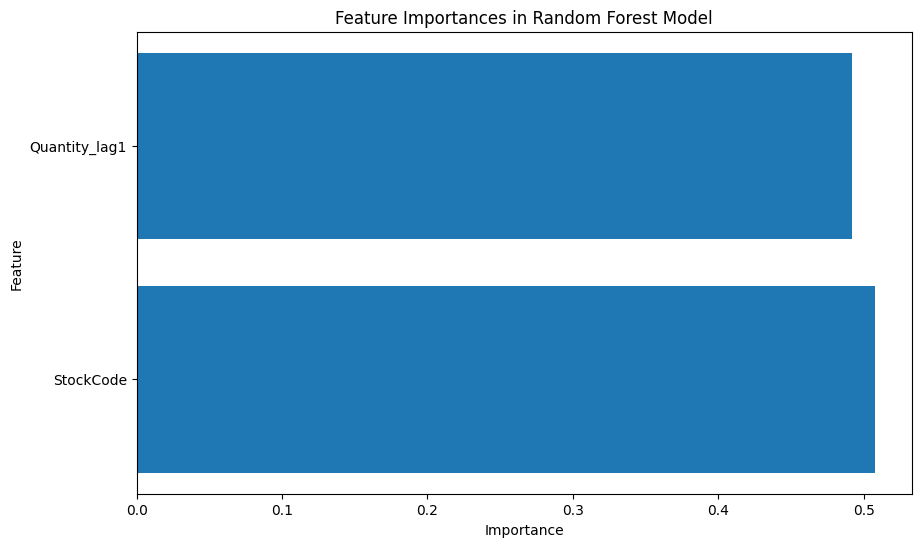

In [4]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf_model.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.show()
